In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

%matplotlib inline

In [18]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/ideal_case_data.csv')
df

,x,y,z,theta,time
0,0.000000,0.0,0.000000e+00,-1.570796,0.0
1,-686.000000,0.0,4.200539e-14,-1.570796,2.0
2,-1372.000000,0.0,8.401077e-14,-1.570796,4.0
3,-2058.000000,0.0,1.260162e-13,-1.570796,6.0
4,-2744.000000,0.0,1.680215e-13,-1.570796,8.0
...,...,...,...,...,...
21995,26753.471899,0.0,1.680992e+02,1.564513,78.0
21996,27439.458358,0.0,1.724095e+02,1.564513,80.0
21997,28125.444817,0.0,1.767197e+02,1.564513,82.0
21998,28811.431276,0.0,1.810299e+02,1.564513,84.0


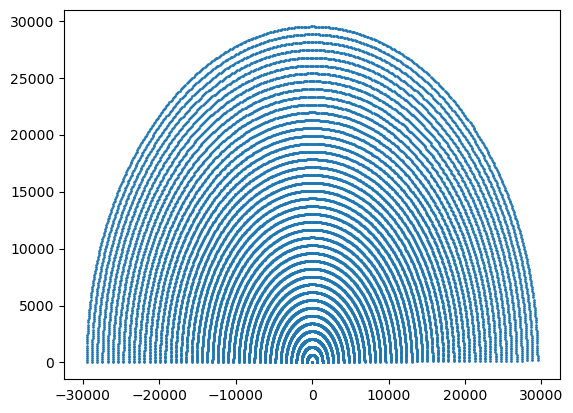

In [20]:
plt.scatter(df['x'],df['z'], s =0.9 )

In [21]:
group_t = df.groupby('time')
df_ = group_t.get_group(80).sort_values('x')
# df_.to_csv('interpolate_pts.csv')
df_

,x,y,z,theta,time
40,-27440.000000,0.0,1.680215e-12,-1.570796,80.0
84,-27439.458358,0.0,1.724095e+02,-1.564513,80.0
128,-27437.833453,0.0,3.448121e+02,-1.558230,80.0
172,-27435.125349,0.0,5.172012e+02,-1.551947,80.0
216,-27431.334154,0.0,6.895698e+02,-1.545664,80.0
...,...,...,...,...,...
21820,27426.460016,0.0,8.619112e+02,1.539380,80.0
21864,27431.334154,0.0,6.895698e+02,1.545664,80.0
21908,27435.125349,0.0,5.172012e+02,1.551947,80.0
21952,27437.833453,0.0,3.448121e+02,1.558230,80.0


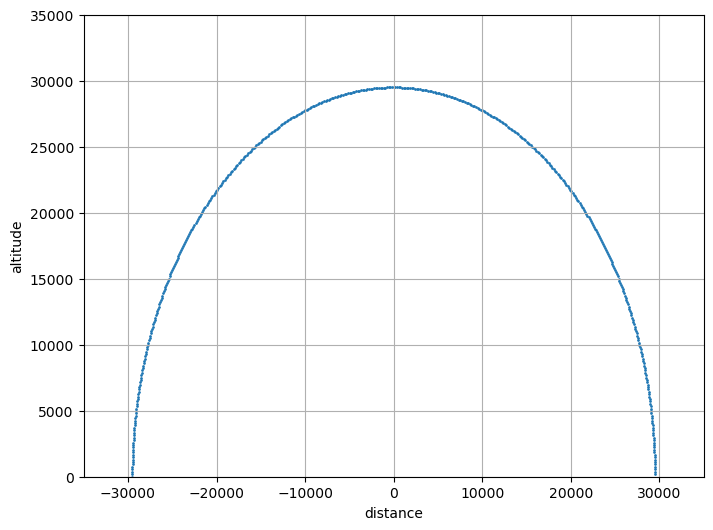

In [23]:
t =df['time'].max()
plt.figure(figsize=(8, 6))
plt.scatter(group_t.get_group(t)['x'],group_t.get_group(t)['z'], s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
# plt.title('E-W')
plt.grid()
plt.show()

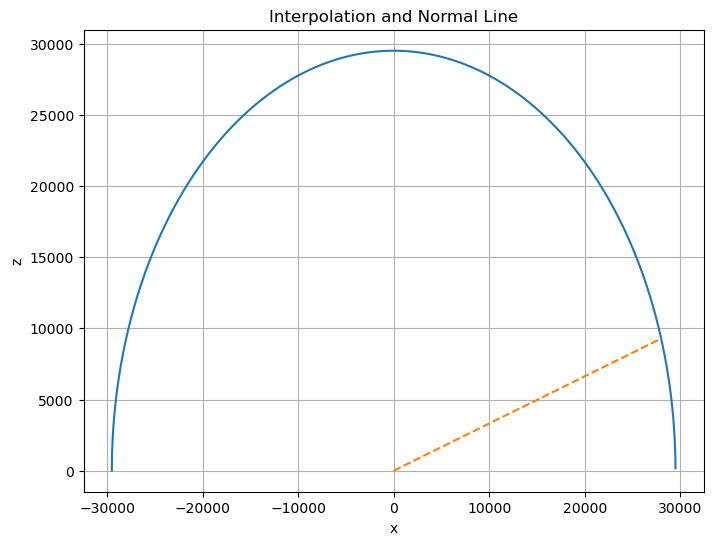

land_x: 0.015042732411529869


In [24]:
t =df['time'].max()

df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/ideal_case_data.csv')
plt.figure(figsize=(8, 6))
group_t = df.groupby('time')
df_ = group_t.get_group(t).sort_values('x')

wave_eq = CubicSpline(df_['x'],df_['z'], bc_type='natural')

x0 = 28000
dz_dx = wave_eq.derivative()(x0)

land_x = x0 + wave_eq(x0) * dz_dx

n_x = [land_x,x0]
n_y = [0,wave_eq(x0)]

plt.plot(df_['x'],df_['z'])
plt.plot(n_x,n_y,'--', label='Noral_line')
# plt.legend()
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.title('Interpolation and Normal Line')
plt.show()

print(f"land_x: {land_x}")

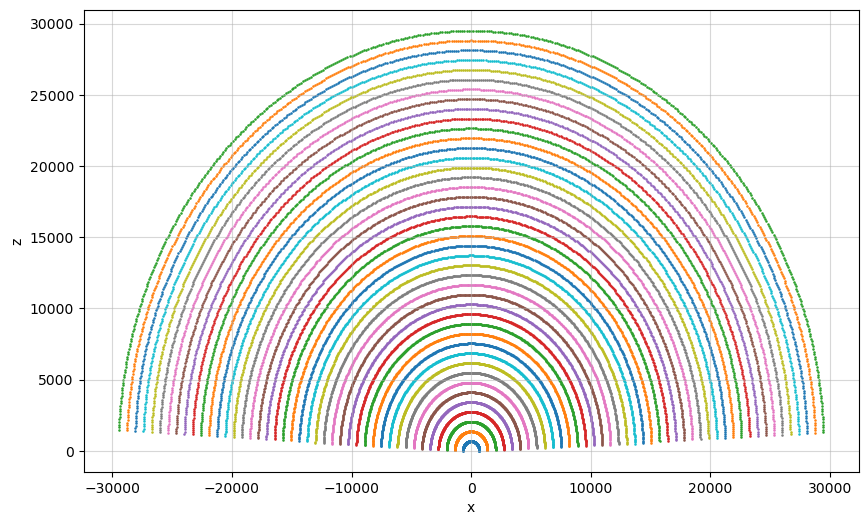

In [25]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/ideal_case_data.csv')

group_t = df.groupby('time')

plt.figure(figsize=(10, 6))

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'], bc_type='natural')
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        plt.scatter(x_l,y_l, s=0.7)

plt.xlabel('x')
plt.ylabel('z')
plt.grid(alpha=0.5)
plt.show()


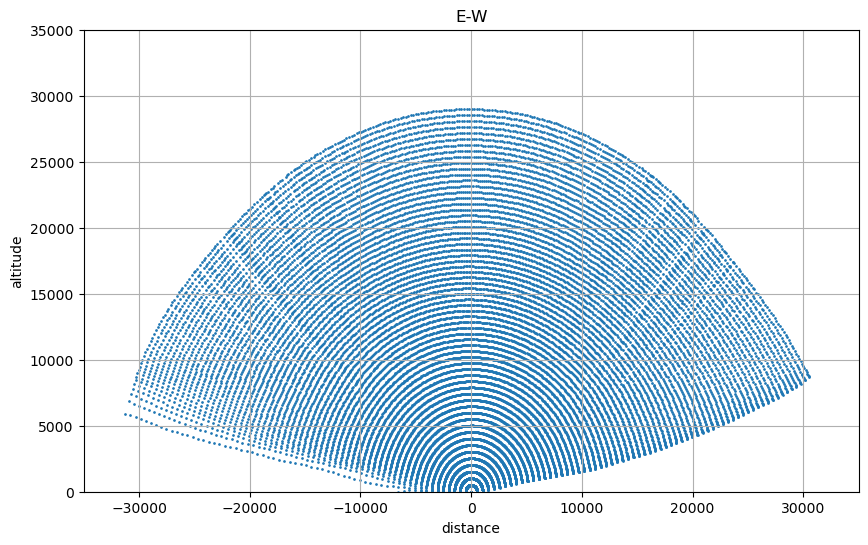

In [30]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind.csv')
plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('E-W')
plt.grid()
plt.show()

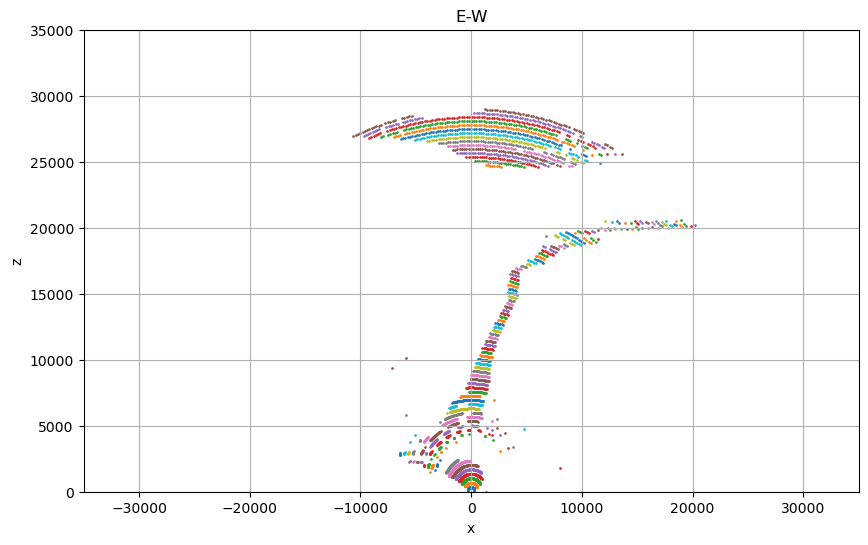

In [23]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind.csv')

group_t = df.groupby('time')

plt.figure(figsize=(10, 6))

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['y'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel('x')
plt.ylabel('z')
plt.title('E-W')
plt.grid()
plt.show()

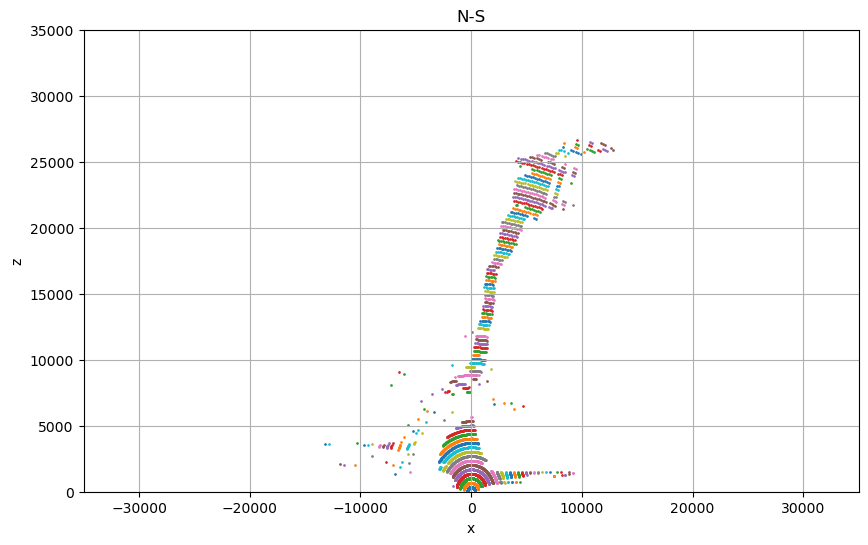

In [32]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind.csv')

group_t = df.groupby('time')

plt.figure(figsize=(10, 6))

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel('x')
plt.ylabel('z')
plt.title('N-S')
plt.grid()
plt.show()

In [ ]:
df_ = df.groupby(['phi','time'])
df_.get_group((0,3)).sort_values('x').reset_index(drop=True)

In [ ]:
from scipy.interpolate import splprep, splev
import csv

df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind.csv')
df_ = df.groupby(['phi','time'])

def gram_schmidt(vectors):
    ortho_vectors = []
    for v in vectors:
        for u in ortho_vectors:
            v = v - np.dot(v, u) * u
        ortho_vectors.append(v / np.linalg.norm(v))
    return ortho_vectors

fields = ['x', 'y', 'z']
w_filename = 'reflected_pts.csv'

with open(w_filename, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
        
    for phi in df['phi'].unique():
        for t in df['time'].unique():
            if t!=0:
                grouped_t = df_.get_group((phi,t)).reset_index(drop=True)
                
                x_pts = grouped_t['x'].values
                y_pts = grouped_t['y'].values
                z_pts = grouped_t['z'].values
    
                 # Check for NaNs and length consistency
                if any(np.isnan(x_pts)) or any(np.isnan(y_pts)) or any(np.isnan(z_pts)):
                    print(f"NaN values found in group (phi={phi}, time={t})")
                    continue
                if len(x_pts) != len(y_pts) or len(y_pts) != len(z_pts):
                    print(f"Inconsistent lengths in group (phi={phi}, time={t})")
                    continue
                
                # Interpolate the points to get the tangent vectors
                try:
                    tck, u = splprep([x_pts, y_pts, z_pts], s=0)
                    deriv = splev(u, tck, der=1)
                except Exception as e:
                    print(f"Error in splprep for group (phi={phi}, time={t}): {e}")
                    continue
                
                tck, u = splprep([x_pts,y_pts,z_pts], s=0)
                deriv = splev(u, tck, der=1)
                
                for i in range(grouped_t.shape[0]):
                    tangent_vector = np.array([deriv[0][i], deriv[1][i], deriv[2][i]])
                    tangent_vector_normalized = tangent_vector / np.linalg.norm(tangent_vector)
    
                    if np.allclose(tangent_vector_normalized, [1, 0, 0]):
                        initial_vector = np.array([0, 1, 0])
                    else:
                        initial_vector = np.array([1, 0, 0])
        
                    # initial_vector = np.array([1, 0, 0]) if tangent_vector_normalized[0] == 0 else np.array([0, 1, 0])
                    ortho_vectors = gram_schmidt([tangent_vector_normalized, initial_vector])
                    perpendicular_vector = ortho_vectors[1]
    
                    if perpendicular_vector[2] == 0:
                        print(f"Perpendicular vector z-component is zero in group (phi={phi}, time={t}, index={i})")
                        continue
                    
                    z0 = z_pts[i]
                    t = -z0 / perpendicular_vector[2]
                    intersection_point = np.array([x_pts[i],y_pts[i],z_pts[i]]) + t * perpendicular_vector
        
                    if (np.abs(intersection_point[0]) < 65) & (np.abs(intersection_point[1]) < 65):
                            coord_vals = intersection_point.tolist()
                            writer.writerow(coord_vals)
        

In [ ]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/wTemp_wWind.csv')

with open('/home/murali/Documents/rass/analysis/in_py_/reflected_ray/output.csv', 'w') as f:
    f.write('x,y,z\n') 

    for phi in df['phi'].unique():
        for t in df['time'].unique():
            if t != 0:
                grouped_t = df[(df['phi'] == phi) & (df['time'] == t)].reset_index(drop=True)
                
                x = grouped_t['x'].values
                y = grouped_t['y'].values
                z = grouped_t['z'].values
                
                pts = np.column_stack((x, y, z))
                t_ = np.arange(len(pts))
                cs = CubicSpline(t_, pts, bc_type='natural')
                dcs = cs.derivative()
                
                for i in range(grouped_t.shape[0]):
                    slope_at_interesting_point = dcs(i)
                    normal_vector = np.cross(dcs(i), dcs(i, nu=1))
                    unit_normal_vector = normal_vector / np.linalg.norm(normal_vector)

                    xi, yi, zi = x[i], y[i], z[i]
                    nx, ny, nz = unit_normal_vector 
                    x_val = xi - (zi / nz) * nx
                    y_val = yi - (zi / nz) * ny

                    if x_val <= 65 and y_val <= 65:
                        f.write(f"{xi},{yi},{zi}\n")
                        

In [37]:
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/wTemp_wWind_0_cpu_log.csv')
df

,x,y,z,theta,time,phi
0,0.000000e+00,0.000000e+00,0.000000,-1.561820,0.0,0.000000
1,-6.711114e+02,-4.523426e+01,-15.339409,-1.625374,2.0,0.000000
2,-1.336794e+03,-1.034780e+02,-77.489862,-1.701462,4.0,0.000000
3,-1.985221e+03,-1.995073e+02,-200.693040,-1.809401,6.0,0.000000
4,-2.585298e+03,-3.914960e+02,-413.273320,-1.978404,8.0,0.000000
...,...,...,...,...,...,...
30887145,1.881431e+06,-6.666448e+06,-9084.109413,236.698808,88.0,3.141593
30887146,1.954672e+06,-6.924261e+06,-9459.104894,242.581968,90.0,3.141593
30887147,2.032794e+06,-7.199648e+06,-9540.418720,246.375777,92.0,3.141593
30887148,2.114541e+06,-7.490242e+06,-9974.954013,259.554301,94.0,3.141593


In [39]:
df['time'].unique()

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
       52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
       78., 80., 82., 84., 86., 88., 90., 92., 94., 96.])

In [40]:
t = 28
group_t = df.groupby('time')
df_ = group_t.get_group(t)
df_

,x,y,z,theta,time,phi
14,52936.744784,-203192.634273,-6128.464380,-3.141084,28.0,0.000000
63,54119.526369,-206979.407054,-6155.325506,-3.141179,28.0,0.000000
112,24710.887614,-105892.509916,-5056.935786,-3.141084,28.0,0.000000
161,41901.947044,-164293.615431,-5748.017625,-3.141497,28.0,0.000000
210,4109.816202,-37817.304915,-3665.772714,-3.131110,28.0,0.000000
...,...,...,...,...,...,...
30886919,32926.965281,-134529.116819,-5447.632797,3.140955,28.0,3.141593
30886968,41074.728632,-161858.807682,-5732.296678,3.141254,28.0,3.141593
30887017,41901.947044,-164293.615431,-5748.017625,3.141497,28.0,3.141593
30887066,34278.403242,-138678.507129,-5483.909526,3.141208,28.0,3.141593


In [ ]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'phi': [0, 1, 2, 3, 4],
    'theta': [0, 1, 2, 3, 4],
    'x': [1.1, 2.2, 3.3, 4.4, 5.5],  # Example x values
    'y': [0.1, 0.2, 0.3, 0.4, 0.5],  # Example y values
    'z': [-1.1, -2.2, -3.3, -4.4, -5.5]  # Example z values
}

df = pd.DataFrame(data)

# Function to handle wrap-around index
def wrap_index(idx, total_length):
    return idx % total_length

# Iterate through each row in the DataFrame
for idx, row in df.iterrows():
    phi = row['phi']
    theta = row['theta']
    
    # Initialize array to store 9 points
    points = []

    # Current point
    points.append({
        'phi': phi,
        'theta': theta,
        'x': row['x'],
        'y': row['y'],
        'z': row['z']
    })

    # Previous and next points with wrap-around
    for d_phi in [-1, 0, 1]:
        for d_theta in [-1, 0, 1]:
            if d_phi == 0 and d_theta == 0:
                continue  # Skip the current point

            # Calculate indices with wrap-around
            idx_phi = wrap_index(idx + d_phi, len(df))
            idx_theta = wrap_index(idx + d_theta, len(df))

            # Append point to list
            points.append({
                'phi': df.loc[idx_phi, 'phi'],
                'theta': df.loc[idx_theta, 'theta'],
                'x': df.loc[idx_phi, 'x'],
                'y': df.loc[idx_theta, 'y'],
                'z': df.loc[idx_theta, 'z']
            })

    # Display or process the 9 points as needed
    print(f"At (phi={phi}, theta={theta}):")
    for p in points:
        print(f"Point: phi={p['phi']}, theta={p['theta']}, x={p['x']}, y={p['y']}, z={p['z']}")
    print("------------------")
